# 导包

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
%matplotlib inline
%config InlineBackend.figure_format ='svg'#为了画图更美观

In [4]:
#导入电影链接文件
links = pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
#导入电影信息文件
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
#导入评分文件
ratings = pd.read_csv('ratings.csv')
ratings.head()
# ratings.query('movieId==1')

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies_add_links = pd.merge(movies,links,on='movieId')

In [8]:
def get_year(x):
    try :
        y = int(x.strip()[-5:-1])
    except:
        y = 0
    return y

movies_add_links['movie_year']=movies_add_links['title'].apply(get_year)
movies_add_links.head()

,movieId,title,genres,imdbId,tmdbId,movie_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0,1995
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0,1995


In [9]:
# 计算每个电影被评论的次数
rating_counts = pd.DataFrame(ratings.groupby('movieId').count()['rating'])
# rating_counts.rename(columns={'ratings':'ratingCount'},inpalce=True)
rating_counts.columns=['ratingCount']
rating_counts.head()

,ratingCount
movieId,
1,215
2,110
3,52
4,7
5,49


In [11]:
movie_add_rating = pd.merge(movies_add_links,rating_counts,on='movieId')
movie_add_rating.head()

,movieId,title,genres,imdbId,tmdbId,movie_year,ratingCount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1995,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,1995,110
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,1995,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0,1995,7
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0,1995,49


In [12]:
# 获取每个电影的平均评分
rating_means = pd.DataFrame(ratings.groupby('movieId').mean()['rating'])
rating_means.columns=['rating_mean']
rating_means.head()

,rating_mean
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [15]:
movie_total = pd.merge(movie_add_rating,rating_means,on='movieId')
movie_total.head()

,movieId,title,genres,imdbId,tmdbId,movie_year,ratingCount,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1995,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,1995,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,1995,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0,1995,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0,1995,49,3.071429


<function matplotlib.pyplot.show>

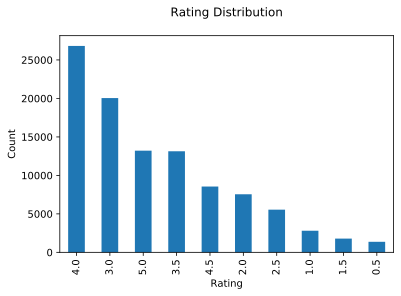

In [16]:
# 评分分布情况
ratings.rating.value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
# plt.savefig('rating.png',bbox_inches='tight')
plt.show

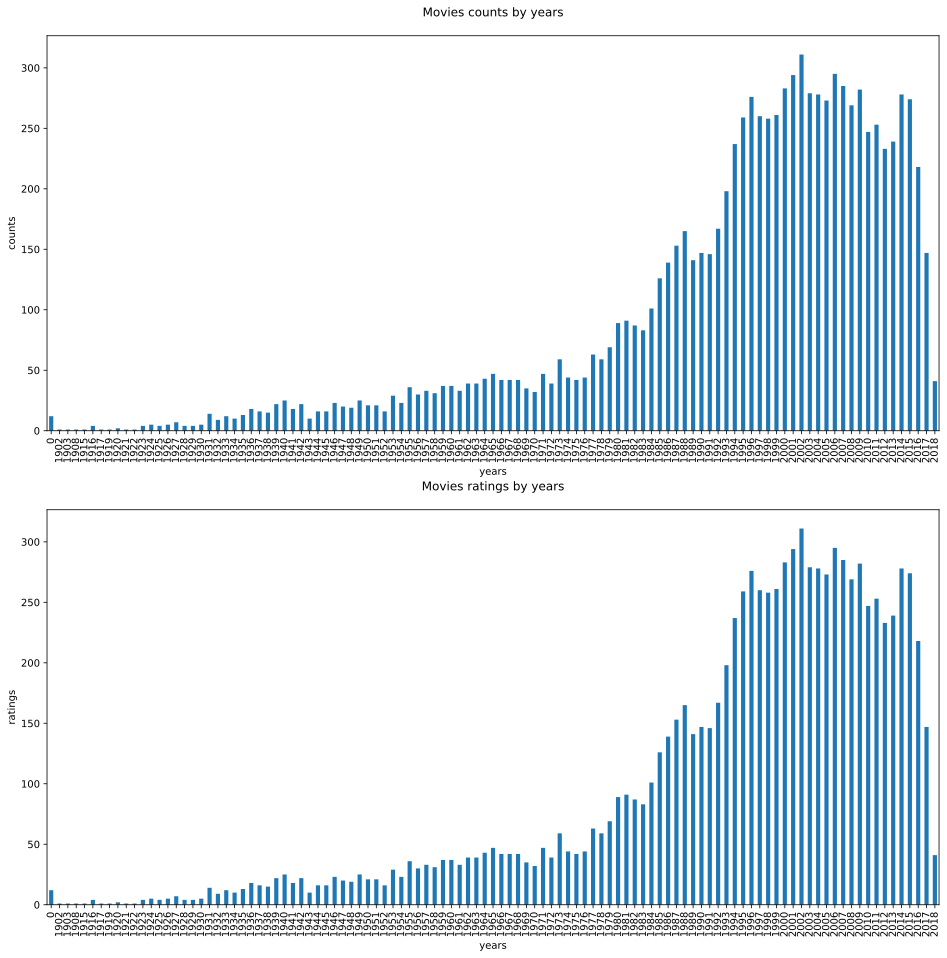

In [24]:
# 可视化每年电影数量和每年电影被评论数
plt.figure(figsize=(16,16))
# 每年电影数
plt.subplot(2,1,1)
movie_total.groupby('movie_year')['ratingCount'].count().plot(kind='bar')
plt.title('Movies counts by years\n')
plt.xlabel('years')
plt.ylabel('counts')
# 每年电影评论数
plt.subplot(2,1,2)
movie_total.groupby('movie_year')['ratingCount'].count().plot(kind='bar')
plt.title('Movies ratings by years\n')
plt.xlabel('years')
plt.ylabel('ratings')
plt.show()

In [28]:
# 构建要使用与筛选的电影信息
combine_movie = pd.merge(ratings,rating_counts,on='movieId')
combine_movie = combine_movie.dropna()
combine_movie.head()

,userId,movieId,rating,timestamp,ratingCount
0,1,1,4.0,964982703,215
1,5,1,4.0,847434962,215
2,7,1,4.5,1106635946,215
3,15,1,2.5,1510577970,215
4,17,1,4.5,1305696483,215


In [27]:
combine_movie.shape

(100836, 5)

In [29]:
# 计算70%评论数为多少用以筛选
combine_movie.ratingCount.quantile(np.arange(.5,1,.5))

0.5    39.0
Name: ratingCount, dtype: float64

In [30]:
combine_movie.ratingCount.quantile(0.7)

69.0

In [32]:
popularity_threshold = combine_movie.ratingCount.quantile(0.7)
# 根据位置进行筛选
rating_popular_movie = combine_movie.query('ratingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,timestamp,ratingCount
0,1,1,4.0,964982703,215
1,5,1,4.0,847434962,215
2,7,1,4.5,1106635946,215
3,15,1,2.5,1510577970,215
4,17,1,4.5,1305696483,215


In [34]:
rating_popular_movie.shape

(30554, 5)

In [38]:
# 将表格转化为2D矩阵
movie_pivot = rating_popular_movie.pivot(index='movieId',columns='userId',values='rating').fillna(0)
movie_pivot.shape
movie_pivot

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
10,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
11,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,2.5,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79132,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
89745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
91529,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5


In [41]:
# 选出评分最多的电影id
movie_l = ratings.groupby('movieId').count().sort_values('rating',ascending=False).index[0]
movie_total[movie_total.movieId==movie_l]

,movieId,title,genres,imdbId,tmdbId,movie_year,ratingCount,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,1994,329,4.164134


In [64]:
def get_movie(df_movie,movie_list):
    #根据电影ID获取电影的详细信息
    df_movieId = pd.DataFrame(movie_list,index=np.arange(len(movie_list)),columns=['movieId'])
    corr_movies = pd.merge(df_movieId,df_movie,on='movieId')
    return corr_movies

In [66]:
def pearson_method(df_movie, pivot, movie, num):
    # 获取目标电影属性
    bones_ratings = pivot[movie]
#     print(bones_ratings)
    similar_to_bones = pivot.corrwith(bones_ratings,0)
    corr_bones = pd.DataFrame(similar_to_bones,columns=['pearson'])
    corr_bones.dropna(inplace=True)
    # 相关性与评论数合并
    corr_summary = corr_bones.join(df_movie[['movieId','ratingCount']].set_index('movieId'))
    # 筛选出对应数量的高关联性电影
    movie_list = corr_summary[corr_summary['ratingCount']>100].sort_values('pearson',ascending=False).index[:num].tolist()
    return movie_list

In [67]:
# 获取电影ID列表
movie_list = pearson_method(movie_total,movie_pivot,movie_l,6)
movie_list

[356, 480, 110, 434, 608, 153]

In [65]:
def knn_method(movie_pivot,movie,num):
    # 压缩稀疏矩阵
    movie_pivot_matrix = csr_matrix(movie_pivot.values)
    # 用k近邻的算法是“brute”，指定“metric=cosine”，以便计算余弦相似度
    model_knn = NearestNeighbors(metric='cosine',algorithm='brute')
    model_knn.fit(movie_pivot_matrix)
    distance,indices = model_knn.kneighbors(movie_pivot.loc[[movie],:].values.reshape(1,-1),n_neighbors=num)
    movie_list = movie_pivot.iloc[indices[0],:].index
    return movie_list

movie_list = knn_method(movie_pivot,movie_l,6)
corr_movies = get_movie(movie_total,movie_list)
corr_movies

,movieId,title,genres,imdbId,tmdbId,movie_year,ratingCount,rating_mean
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,1994,329,4.164134
1,318,"Shawshank Redemption, The (1994)",Crime|Drama,111161,278.0,1994,317,4.429022
2,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,107290,329.0,1993,238,3.750000
3,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0,1994,307,4.197068
4,110,Braveheart (1995),Action|Drama|War,112573,197.0,1995,237,4.031646
5,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,102926,274.0,1991,279,4.161290


In [77]:
def SVD_method(movie_pivot,movie,num):
    SVD = TruncatedSVD(n_components=12,random_state=17)
    matrix = SVD.fit_transform(movie_pivot.values)
    movie_SVD = pd.DataFrame(matrix,index=movie_pivot.index).T
    corr= movie_SVD.corr()
    movie_list = corr.sort_values(movie,ascending=False).index[0:num].tolist()
    return movie_list

In [78]:
movie_list = SVD_method(movie_pivot,movie_l,6)
corr_movies = get_movie(movie_total,movie_list)
corr_movies

,movieId,title,genres,imdbId,tmdbId,movie_year,ratingCount,rating_mean
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,1994,329,4.164134
1,318,"Shawshank Redemption, The (1994)",Crime|Drama,111161,278.0,1994,317,4.429022
2,527,Schindler's List (1993),Drama|War,108052,424.0,1993,220,4.225000
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,102926,274.0,1991,279,4.161290
4,150,Apollo 13 (1995),Adventure|Drama|IMAX,112384,568.0,1995,201,3.845771
5,110,Braveheart (1995),Action|Drama|War,112573,197.0,1995,237,4.031646
